0.5761401033597136


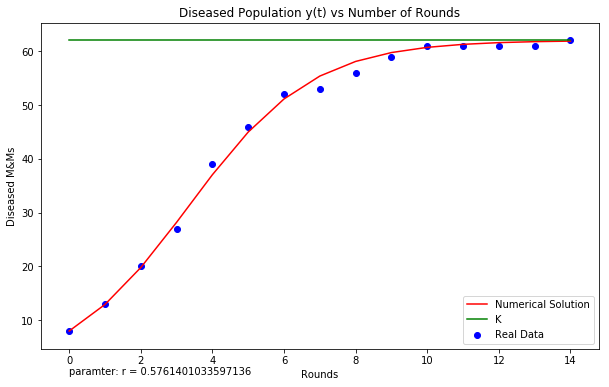

In [2]:
#############################################################################################
#   Author:             Jeffery Summers                                                     #
#   Purpose:            Use simulated annealing to find a the parameter for the logistic    #
#                       equation                                                            #
#                                                                                           #
#############################################################################################



import scipy as sp
import numpy as np
import math
import random as rand
import matplotlib.pyplot as plt

#This will standardize all figure sizes.
plt.rcParams["figure.figsize"] = [10,6]

rand.seed()

# Array holding our actual data
p_Array = [8, 13, 20, 27, 39, 46, 52, 53, 56, 59, 61, 61, 61, 61, 62]
# Let the parameter 'r' be initialized to 1 (this value really doesn't matter as it will be
# relaxed down to a reasonable value)
r = 1
# The capacity of the population, 'k' is 62
k = 62
# Initialize the array for the solution of the logistic differential equation
y = [8]
# Filling the y array
for i in range(1,15):
    y.append(k/((k-y[0])/(y[0]*math.exp((-1)*r*i))))

# Initializing the Least Squares Array
lst_Squares_Array = []*15
for j in range(0, 15):
    lst_Squares_Array.append((y[j]-p_Array[j])**2)

# defining the cost function that needs to be minimized
cost = np.sum(lst_Squares_Array)
cost_Array = []
cost_Array.append(cost)
r_Array = []
r_Array.append(r)

# This is the primary section that performs the simulated annealing
# Initialize temperature
T = 10000
rand.seed(10)

# These loops perform the simulated annealing algorithm
for i in range(1, 50):
    for g in range(0,100):
        r = rand.random()
        lst_Squares_Array_temp = []
        ytemp = []
        ytemp.append(y[0])
        for l in range(1, 15):
            ytemp.append(k * y[0] / ((k - y[0]) * math.exp((-1) * r * l) + y[0]))


        for j in range(0, 15):
            lst_Squares_Array_temp.append((ytemp[j]-p_Array[j])**2)

        cost_New = np.sum(lst_Squares_Array_temp)
        # Primary logic block for simulated annealing
        # keeps the new cost value if it is smaller than the previous
        # possibly keeps the new cost even if it is greater than the previous
        # to avoid staying in local minima
        if cost_New <= cost:
            cost = cost_New
        elif cost_New >= cost:
            if math.exp((-1)*cost/T) > rand.random():
                cost = cost_New
        else:
            cost = cost
        r_Array.append(r)
        cost_Array.append(cost)
    T = T-200

index = int(cost_Array.index(min(cost_Array)))
print(r_Array[index])
r = r_Array[index]
soln = []

for i in range(0,15):
    soln.append(k*y[0]/((k-y[0])*math.exp((-1)*r*i)+y[0]))

time = []
for i in range(0,15):
    time.append(i)

r_String = 'paramter: r = ' + str(r)
plt.plot(time, soln, color='red', label='Numerical Solution')
plt.plot(time, [k]*len(soln), color ='green', label='K')
plt.scatter(time,p_Array,color='blue', label='Real Data')
plt.legend()
plt.title('Diseased Population y(t) vs Number of Rounds')
plt.xlabel('Rounds')
plt.ylabel('Diseased M&Ms')
plt.text(0,0, r_String)
plt.show()